<a href="https://colab.research.google.com/github/rea-sna/machine-learning-exercise/blob/main/g2446043___3_03_SVM_blk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習アルゴリズムの例
## SVM（サポートベクターマシン）

#### ライブラリの読み込み

In [49]:
# Notebookでグラフをインライン表示する指定
%matplotlib inline

# 基本的なライブラリの読み込み
!pip install japanize-matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# 自作の関数を読み込む
# ファイル function_plotbound.py を同じディレクトリに置く必要がある
from function_plotbound import plot_bound

#### データの読み込み
Noise：機械の運転音  
RPM：機械の回転数  
Check：部品の点検結果（0は異常なし、1は異常あり）  

NoiseとRPMが予測(判別)に用いる特徴量、Checkが正解ラベルです。

In [50]:
# CSVファイルのデータ（カンマ区切り）をデータフレーム形式で読み込み
df = pd.read_csv('machine_status.csv', sep=",")
# 先頭5行を確認
display(df.head(5))

# 特徴量とラベルを分割
X = df[["Noise", "RPM"]]
y = df["Check"]

,Noise,RPM,Check
0,9.59,7.44,0
1,11.98,3.09,1
2,10.41,11.78,0
3,13.64,15.14,0
4,8.52,7.54,0


#### 特徴量の値を標準化
NoiseとRPMを標準化します。  
標準化にはscikit-learnの関数StandardScaler()を使います。  
まず最初に標準化のためのスケーラー（物差し）のオブジェクトを生成します。  
次に、このスケーラーをデータに適合（フィッティング）させます。  
そして、フィッティング済みのスケーラーを使い値の変換を行います。

In [51]:
# 標準化を行うスケーラーの関数を読み込む
from sklearn.preprocessing import StandardScaler
# スケーラーのオブジェクトを生成
scaler = StandardScaler()
# スケーラーのフィッティング（データの分布から物差しを作る）
scaler.fit(X)
# 各項目の値をスケーラーで変換し、Xに格納
X = scaler.transform(X)
# 標準化された値をデータフレームに変換して列名を補充
X = pd.DataFrame(X)
X.columns = df.columns[0:2]

### SVM（線形カーネル）による予測
SVM（線形カーネル）で予測モデルを作成し、正解率の算出と決定境界の描画を行います。

accuracy C: 1.0 :  0.8323170731707317


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


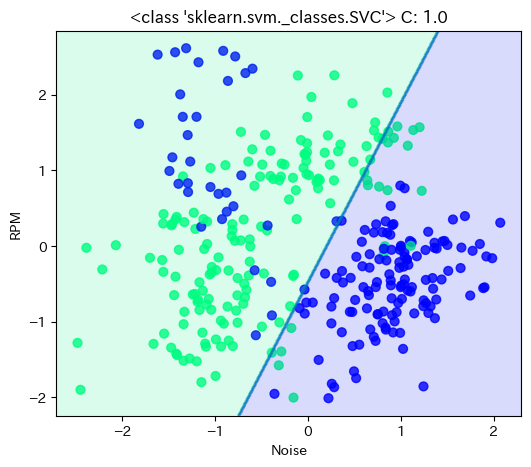

In [52]:
# ライブラリから関数を読み込む
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVMのモデル（線形カーネル）
svc = SVC(kernel='linear', C=1.0)
# モデルをデータに適合させる(フィッティング)
svc.fit(X,y)
# 予測値をもとに正解率を計算
print("accuracy C:", svc.C,
      ": ", accuracy_score(y, svc.predict(X)))

# 散布図と決定境界
plt.figure(figsize=(6,5))
plt.scatter(X["Noise"], X["RPM"], c=y,
            s=40, cmap="winter_r", alpha=0.8)
plot_bound(X, svc, cmap="winter_r")

# 表題を追加（ハイパーパラメータの値をモデルから取得）
plt.title(str(type(svc)) +
          " C: " + str(svc.C))

# 軸ラベルを追加
plt.xlabel("Noise")
plt.ylabel("RPM")

# 表示
plt.show()

### SVM（多項式カーネル）による予測
SVM（多項式カーネル）で予測モデルを作成し、正解率の算出と決定境界の描画を行います。

accuracy C: 10.0  gamma: 1.0 :  0.7560975609756098


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


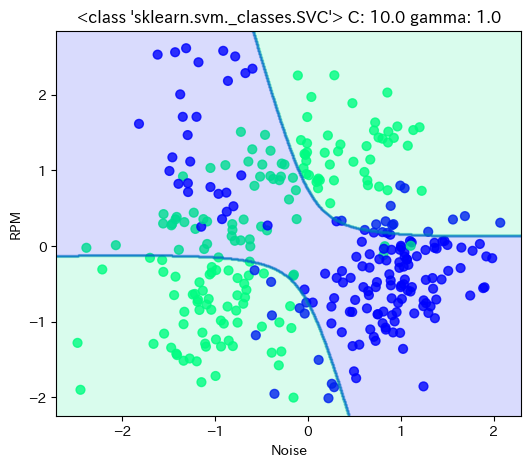

In [53]:
# SVMのモデル（多項式カーネル）
svc = SVC(kernel='poly', degree=2, C=10.0, gamma=1.0)
# モデルをデータに適合させる(フィッティング)
svc.fit(X,y)

# 予測値をもとに正解率を計算
print("accuracy C:", svc.C, " gamma:", svc.gamma,
      ": ", accuracy_score(y, svc.predict(X)))

# 散布図と決定境界
plt.figure(figsize=(6,5))
plt.scatter(X["Noise"], X["RPM"], c=y,
            s=40, cmap="winter_r", alpha=0.8)
plot_bound(X, svc, cmap="winter_r")
plt.title(str(type(svc)) +
          " C: " + str(svc.C) +
          " gamma: " + str(svc.gamma))
plt.xlabel("Noise")
plt.ylabel("RPM")
plt.show()



### SVM（ガウシアンカーネル）による予測
SVM（ガウシアンカーネル）で予測モデルを作成し、正解率の算出と決定境界の描画を行います。

accuracy C:  10.0  gamma:  1.0 :  0.9329268292682927


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


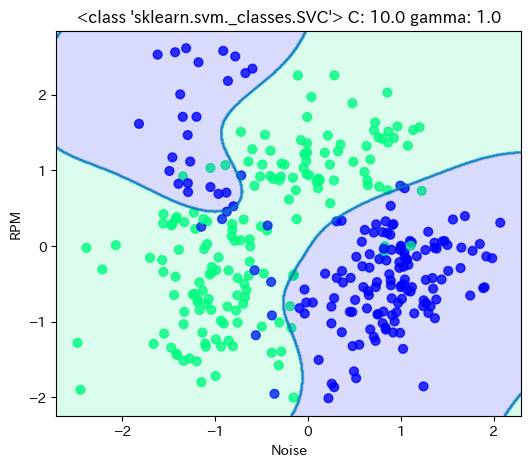

In [54]:
# SVMのモデル（RBFカーネル）
svc = SVC(kernel='rbf', C=10.0, gamma=1.0)
# モデルをデータに適合させる(フィッティング)
svc.fit(X,y)

# 予測値をもとに正解率を計算
print("accuracy C: ", svc.C, " gamma: ", svc.gamma,
      ": ", accuracy_score(y, svc.predict(X)))

# 散布図と決定境界
plt.figure(figsize=(6,5))
plt.scatter(X["Noise"], X["RPM"], c=y,
            s=40, cmap="winter_r", alpha=0.8)
plot_bound(X, svc, cmap="winter_r")
plt.title(str(type(svc)) +
          " C: " + str(svc.C) +
          " gamma: " + str(svc.gamma))
plt.xlabel("Noise")
plt.ylabel("RPM")
plt.show()

#### ハイパーパラメータの変更
ペナルティを強くしてモデルを再作成します。

accuracy C:  0.1  gamma:  0.5 :  0.9085365853658537


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


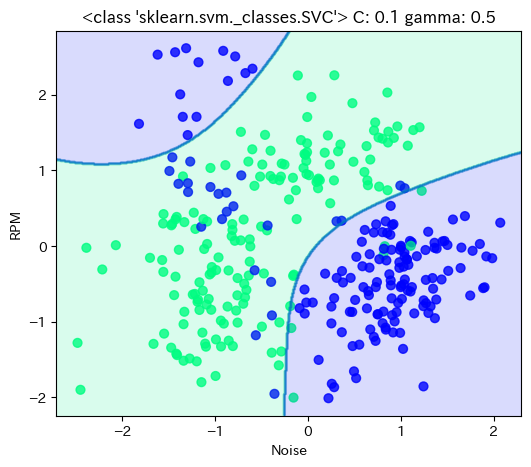

In [55]:
# SVM（RBFカーネル、ペナルティ強）
svc = SVC(kernel="rbf", C=0.1, gamma=0.5)
svc.fit(X,y)

# 予測値をもとに正解率を計算
print("accuracy C: ", svc.C, " gamma: ", svc.gamma,
      ": ", accuracy_score(y, svc.predict(X)))

# 散布図と決定境界
plt.figure(figsize=(6,5))
plt.scatter(X["Noise"], X["RPM"], c=y,
            s=40, cmap="winter_r", alpha=0.8)
plot_bound(X, svc, cmap="winter_r")
plt.title(str(type(svc)) +
          " C: " + str(svc.C) +
          " gamma: " + str(svc.gamma))
plt.xlabel("Noise")
plt.ylabel("RPM")
plt.show()

#### ハイパーパラメータの変更
ペナルティを弱くしてモデルを再作成します。

accuracy C:  1000.0  gamma:  2.0 :  0.9664634146341463


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


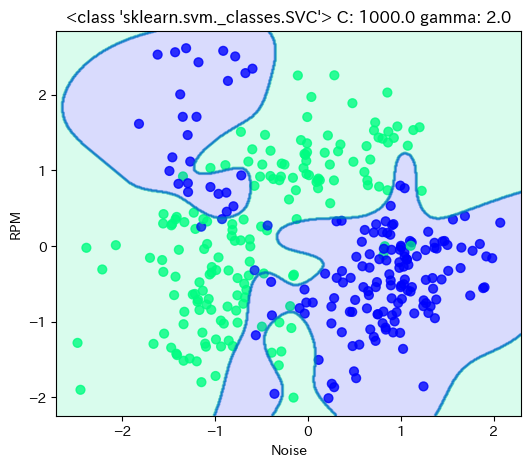

In [56]:
# SVM（RBFカーネル、ペナルティ弱）
svc = SVC(kernel="rbf", C=1000.0, gamma=2.0)
svc.fit(X,y)

# 予測値をもとに正解率を計算
print("accuracy C: ", svc.C, " gamma: ", svc.gamma,
      ": ", accuracy_score(y, svc.predict(X)))

# 散布図と決定境界
plt.figure(figsize=(6,5))
plt.scatter(X["Noise"], X["RPM"], c=y,
            s=40, cmap="winter_r", alpha=0.8)
plot_bound(X, svc, cmap="winter_r")
plt.title(str(type(svc)) +
          " C: " + str(svc.C) +
          " gamma: " + str(svc.gamma))
plt.xlabel("Noise")
plt.ylabel("RPM")
plt.show()

#### ハイパーパラメータの変更
ペナルティを弱くした状態で、フィッティングをさらに細かくしモデルを再作成します。

accuracy C:  1000.0  gamma:  100.0 :  1.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


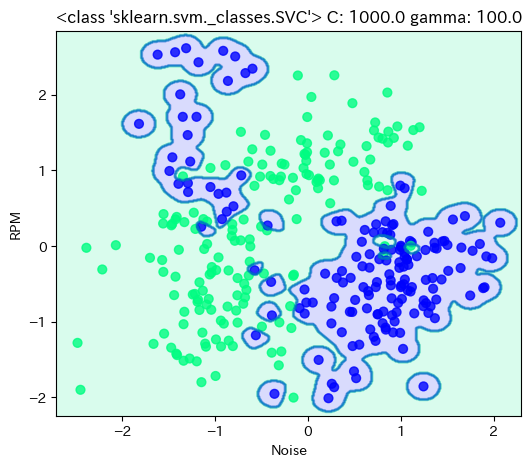

In [57]:
# SVM（RBFカーネル、ペナルティ強、フィッティングを細密化）
svc = SVC(kernel="rbf", C=1000.0, gamma=100.0)
svc.fit(X,y)

# 予測値をもとに正解率を計算
print("accuracy C: ", svc.C, " gamma: ", svc.gamma,
      ": ", accuracy_score(y, svc.predict(X)))

# 散布図と決定境界
plt.figure(figsize=(6,5))
plt.scatter(X["Noise"], X["RPM"], c=y,
            s=40, cmap="winter_r", alpha=0.8)
plot_bound(X, svc, cmap="winter_r")
plt.title(str(type(svc)) +
          " C: " + str(svc.C) +
          " gamma: " + str(svc.gamma))
plt.xlabel("Noise")
plt.ylabel("RPM")
plt.show()

### 距離の算出
SVMでは、境界面からの距離を算出することができます。   

[-1.33513069 -0.72675376 -0.63233807 -3.98392948 -1.49513571 -1.51175332]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


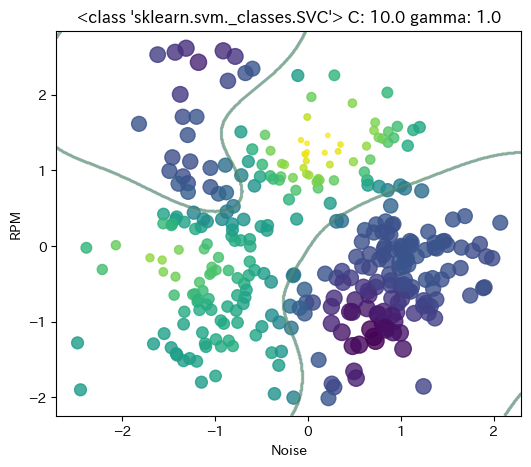

In [58]:
# SVMのモデル（RBFカーネル）
svc = SVC(kernel="rbf", C=10.0, gamma=1.0)
svc.fit(X,y)

# 0/1ではなく境界面からの距離を算出する
dist = svc.decision_function(X)

# 最初の6件について表示
print(dist[0:6])

# 境界面からの距離をマーカーの大きさで表す
# 距離の値(最小値から最大値)を10から150の値に変換
size = 10 + 140 * (dist-np.min(dist))/(np.max(dist)-np.min(dist))

# 散布図と決定境界
plt.figure(figsize=(6,5))
plt.scatter(X["Noise"], X["RPM"], c=dist,
            s=size, cmap="viridis_r", alpha=0.8)
plot_bound(X, svc, fill=False,cmap="viridis_r")
plt.title(str(type(svc)) +
          " C: " + str(svc.C) +
          " gamma: " + str(svc.gamma))
plt.xlabel("Noise")
plt.ylabel("RPM")
plt.show()

## SVMの回帰問題への適用

#### データの読み込み
Meeting：10人あたりの年間の業務評価面接回数  
Reassign：3年間に職務や待遇の変化があった人数の比率  
Score：スタッフのモチベーション  

MeetingとReassignが予測に用いる特徴量、Scoreが予測すべき目的変数の値です。

In [59]:
# CSVファイルのデータ（カンマ区切り）をデータフレーム形式で読み込み
df = pd.read_csv("ESSurvey.csv", sep=",")
# 先頭5行を確認
display(df.head(5))
# 要約統計量を表示
display(df.describe())

# 特徴量とラベルを分割
X = df[["Meeting", "Reassign"]]
y = df["Score"]

,Meeting,Reassign,Score
0,15,0.26,72.7
1,11,0.45,30.1
2,32,0.40,74.9
3,9,0.44,55.9
4,31,0.36,54.1


,Meeting,Reassign,Score
count,124.000000,124.000000,124.000000
mean,22.306452,0.332903,66.154839
std,8.898869,0.112234,11.987387
min,2.000000,0.110000,30.100000
25%,15.750000,0.250000,58.825000
50%,22.000000,0.340000,66.650000
75%,29.000000,0.410000,73.325000
max,50.000000,0.630000,99.500000


#### 特徴量の値を標準化
MeetingとReaasignを標準化します。  
標準化にはscikit-learnの関数StandardScaler()を使います。  

In [60]:
# スケーラーのオブジェクトを生成
scaler = StandardScaler()
# スケーラーのフィッティング（データの分布から物差しを作る）
scaler.fit(X)
# 各項目の値をスケーラーで変換し、Xに格納
X = scaler.transform(X)

# 標準化された値をデータフレームに変換して列名を補充
X = pd.DataFrame(X)
X.columns = df.columns[0:2]

#### モデルの作成と予測結果の確認
モデルを作成し、平均絶対誤差(MAE)の値を確認します。  
MAEの算出にはscikit-learnの関数mean_absolute_error()を使います。  

In [61]:
# ライブラリから関数を読み込む
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# サポートベクター回帰
svr = SVR(kernel="rbf", C=10.0, gamma=1.0)

# モデルをデータに適合させる(フィッティング)
svr.fit(X,y)

# 予測値を算出
pred = svr.predict(X)

# 予測値をもとに平均絶対誤差(MAE)を計算
print("MAE: ", mean_absolute_error(y, pred))

MAE:  5.716889982098981


#### 散布図上で予測値の等高線を描画
特徴量を横軸・縦軸とし、目的変数の実測値をマーカーの色（濃さ）として散布図を描きます。  
また、決定境界を描画するために作成したユーザ関数を使い予測値の大小を等高線で描きます。

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


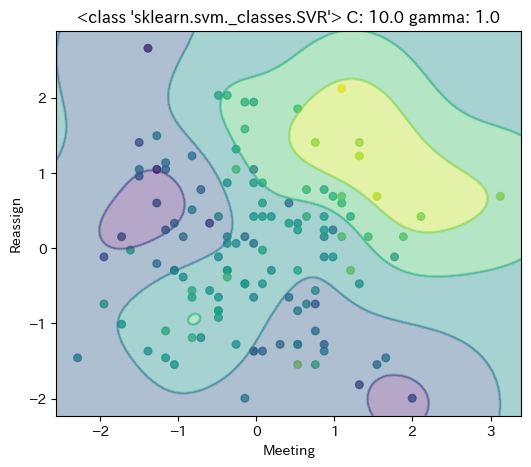

In [62]:
# 散布図を描画
# 散布図と決定境界
plt.figure(figsize=(6,5))
plt.scatter(X["Meeting"], X["Reassign"], c=y,
            s=30, cmap="viridis", alpha=0.8)
plot_bound(X, svr, levels=5, cmap="viridis", alpha=0.4)
plt.title(str(type(svr)) +
          " C: " + str(svr.C) +
          " gamma: " + str(svr.gamma))
plt.xlabel("Meeting")
plt.ylabel("Reassign")
plt.show()

#### 参考：特徴量を標準化しない場合
両軸の単位が異なり、距離の算定にあたって偏りが生じたままでモデルを作成すると、どのような結果になるか確認してみましょう。

MAE:  6.6853084234379505


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


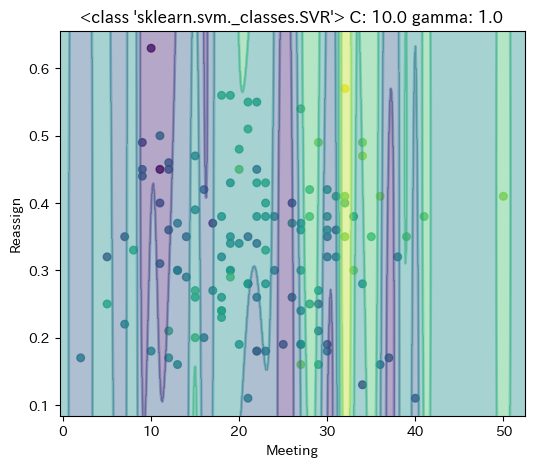

In [63]:
# データを再読み込み
df = pd.read_csv("ESSurvey.csv", sep=",")
# 特徴量とラベルを分割
X = df[["Meeting", "Reassign"]]
y = df["Score"]

# 特徴量を標準化せずにフィッティングして予測値を算出
svr.fit(X,y)
pred = svr.predict(X)

# 予測値をもとに平均絶対誤差(MAE)を計算
print("MAE: ", mean_absolute_error(y, pred))

# 散布図と等高線
plt.figure(figsize=(6,5))
plt.scatter(X["Meeting"], X["Reassign"], c=y,
            s=30, cmap="viridis", alpha=0.8)
plot_bound(X, svr, levels=5, cmap="viridis", alpha=0.4)
plt.title(str(type(svr)) +
          " C: " + str(svr.C) +
          " gamma: " + str(svr.gamma))

# 軸ラベルを追加
plt.xlabel("Meeting")
plt.ylabel("Reassign")

# 表示
plt.show()


# **今日の課題**
## ハイパーパラメタ: $C$と$\gamma$(gamma)の設定による影響について，考察してください．
* `C=1000.0, gamma=100.0`のようにペナルティを強く、かつフィッティングを細かくすると、範囲がより狭まって（点にピッタリとくっつくように）表示される。
* ペナルティを強くしたとき（`C=0.1, gamma=0.5`）、分類に大きな誤差（本来青のデータが青に区分けされていない、など）が生まれるが、ペナルティを弱くした場合（`C=1000.0, gamma=2.0`や`C=1000.0, gamma=100.0`）には正しく分類されていないデータはいくつかあるもののあるものの、前者と比べると大幅に改善している。
* ただ、この時点での分類が正確すぎても、未知のデータを正しく分類できない可能性がある。（過学習）
